# Graficador de Mediciónes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


## Directorio y carga de archivos

In [48]:
# directorio dde entrada de datos(Mediciones)
DATA_DIR = "data"
# Directorio donde se guardan las Mediciones
MEASURE_DIR = "mic_behringher_ecm8000"
# Directorio de salida de gráficos
OUTPUT_DIR = "output"
output_path = os.path.join(OUTPUT_DIR, MEASURE_DIR)
os.makedirs(output_path, exist_ok=True)
# crear una lista que contiene los archivos .txt de la medición
files = os.listdir(os.path.join(DATA_DIR, MEASURE_DIR))
print(files[2])

Behringher-90.txt


## Análisis de datos

In [49]:
#crear un dataframe a partir de un archivo .txt (o un .csv)
path_file = os.path.join(DATA_DIR, MEASURE_DIR, files[2]) #Ruta del archivo
df = pd.read_csv(path_file, delimiter= "\t", header=1)
df

,Frequency (Hz),Magnitude (dB),Phase (degrees),Coherence
0,1.464844,-22.50,53.32,0.51
1,2.929688,-22.50,53.32,0.51
2,4.394531,-22.50,53.32,0.51
3,5.859375,-19.19,-178.72,0.60
4,7.324219,-14.48,160.38,0.90
...,...,...,...,...
458,23062.500000,-2.63,37.78,0.77
459,23250.000000,-0.60,16.11,0.54
460,23437.500000,-3.11,-69.48,0.16
461,23625.000000,-3.76,-103.10,0.31


## Graficar Resultados

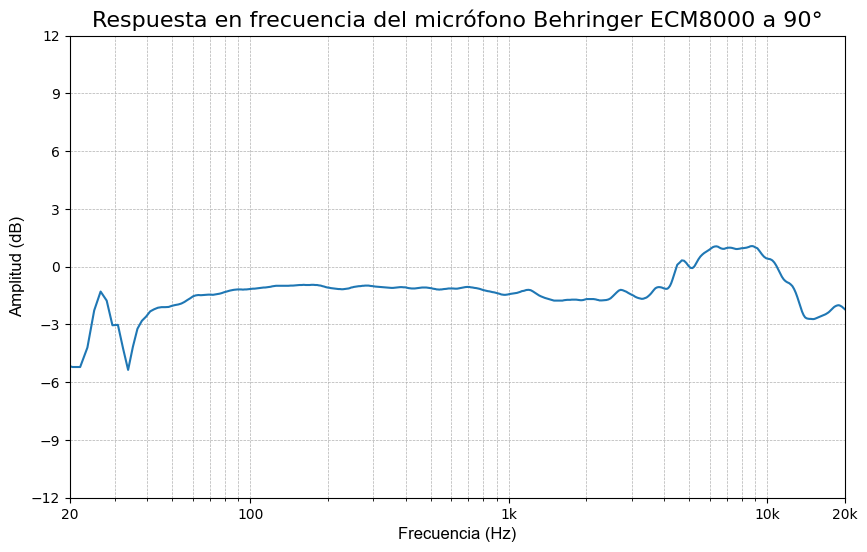

In [50]:
# grafico rapido del dataframe, frecuencia vs amplitud
#limite de los ejes x e y
x_ticks = [20, 100, 1000, 10000, 20000]
x_label = ['20', '100', '1k', '10k', '20k']
y_ticks = np.arange(-12, 13, 3)
plt.figure(figsize=(10,6))
plt.plot(df['Frequency (Hz)'], df['Magnitude (dB)'])
plt.title('Respuesta en frecuencia del micrófono Behringer ECM8000 a 90°', fontsize=16)
# Etiqueta de los ejes en tamaño 10 y fuente Arial
plt.xscale('log')
plt.xlim(20, 20000)
plt.ylim(-12, 12)
plt.yticks(y_ticks)
plt.xticks(x_ticks, x_label)
plt.xlabel('Frecuencia (Hz)', fontsize=12, fontname= 'Arial')  
plt.ylabel('Amplitud (dB)', fontsize=12, fontname= 'Arial')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.savefig(os.path.join(output_path, "Behringher_90.png"), dpi=300)
plt.show()